# Train Decision Tree Model

## Imports

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from typing import Optional, Any
from pathlib import Path
from time import time
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit
from joblib import Parallel, delayed, dump

## Open Datasets

In [2]:
df_train = pd.read_csv("Data-Sets/train_256_antennas.csv")
# df_test  = pd.read_csv("Data-Sets/train_256_antennas.csv")

## Obtain Input and Targets

In [4]:
x_train = df_train[["n_users", "E"]]
y_train = df_train["target"]

# x_test = df_train.columns.drop(["Pe", "target"])
# y_test = df_train["target"]

## K-Fold Model Generation

In [7]:
k_folds = 10

# kf = KFold(n_splits=k, shuffle=True)
kf = StratifiedShuffleSplit(n_splits=k_folds, random_state=0)

In [8]:
clf = DecisionTreeClassifier()

In [13]:
k = 1
dirModels = Path("Trained-Models")

for train_index, test_index in kf.split(x_train, y_train):
    
    x_k_train = x_train.to_numpy()[train_index]
    y_k_train = y_train.to_numpy()[train_index]
    clf.fit(x_k_train, y_k_train)
    
    file_name = dirModels.joinpath("dt_" + str(k) + ".joblib")
    dump(clf, file_name)
    
    k = k + 1

In [14]:
from sklearn.tree import plot_tree

AttributeError: 'list' object has no attribute 'show'

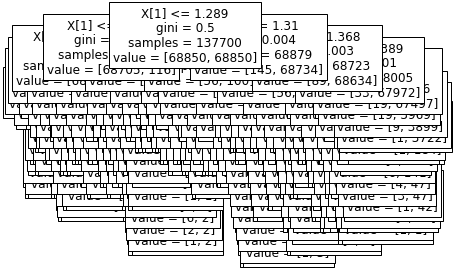

In [17]:
fig = plot_tree(clf, fontsize=12)
fig.show()